# 生成模拟数据

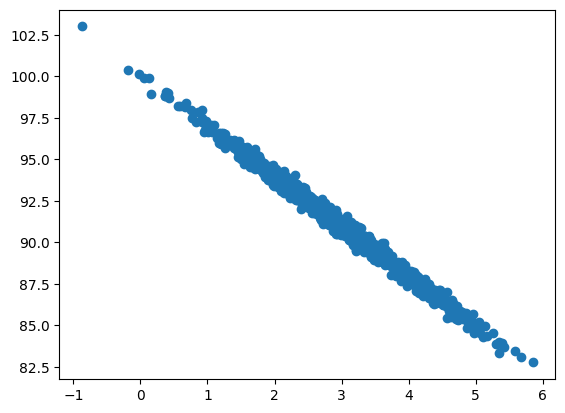

In [1]:
import numpy as np
from pylab import *
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3
scatter(pageSpeeds, purchaseAmount)

# 建模

In [2]:
from scipy import stats

# 用下面的函数可以实现线性回归
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

# 模型评估

使用r方评估模型的效果，r方的值在0和1之间。0意味着拟合非常糟糕，没有捕获到数据中的任何变动。1则意味着拟合非常完美，拟合直线可以捕获数据的所有变动，而且直线两侧的变动应该是一样的。

r方可以作为回归方法的通用评估指标，即不仅仅适用于线性回归。

In [3]:
r_value ** 2

0.9904097404949556

# 模型可视化评估

通过可视化直观看到模型的效果

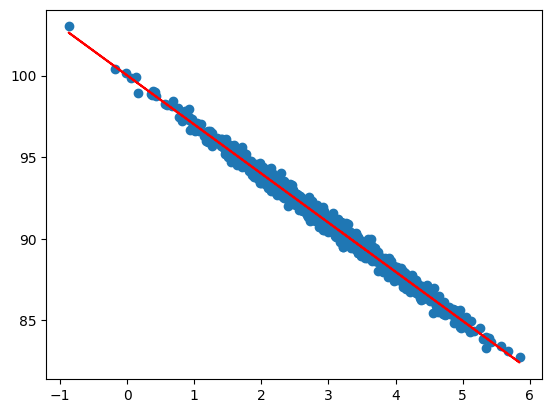

In [5]:
import matplotlib.pyplot as plt

def predict(x):
    return slope * x + intercept

fitLine = predict(pageSpeeds)

plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

# 模型预测

In [11]:
x = np.random.random(3) * 6
x, predict(x)

(array([1.60839961, 3.83475259, 4.53219174]),
 array([95.17378021, 88.48117177, 86.38460974]))

# 探索

## 最小二乘法

在《Python数据科学与机器学习》这本书，介绍了线性回归使用普通最小二乘法计算斜率和截距的逻辑：

1. 斜率，就是两个变量间的相关系数乘以Y的标准差再除以X的标准差
2. 截距，就是Y的均值减去斜率与X均值的乘积

我们将尝试计算斜率和截距，并与上文中线性回归模型给出的结果做对比

In [12]:
def linregress(X, Y):
    manual_slope = np.corrcoef(X, Y)[0, 1] * np.std(Y) / np.std(X)
    manual_intercept = np.mean(Y) - np.mean(X) * manual_slope
    return (manual_slope, manual_intercept)

manual_slope, manual_intercept = linregress(pageSpeeds, purchaseAmount)

In [15]:
(slope, intercept), (manual_slope, manual_intercept)

((-3.006085961524238, 100.00876771139521),
 (-3.0060859615242386, 100.00876771139521))

## 计算r方

在《Python数据科学与机器学习》这本书，介绍了r方的公式：

r方 = 1 - 残差平方和 / 均值差异平方和

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat y_i)^2}{\sum_{i=1}^{n}(y_i-\overline y)^2}
$$

其中，均值差异平方和是指响应变量固有的方差，即Y与均值的差异平方和；残差平方和是指预测值和Y的残差的平方和，寓意是回归模型所不能解释的方差。

可以这样理解：在响应变量固有方差中能解释的方差称为r方，它等于1减去其中不能解释的方差的比例。

*写公式的语法参考：[Markdown/LaTeX 数学公式和符号表](https://zhuanlan.zhihu.com/p/450465546)*

In [16]:
def r_squared(X, Y, slope, intercept):
    residual = X * slope + intercept - Y
    mean_diff = Y - np.mean(Y)
    return 1 - np.dot(residual, residual) / np.dot(mean_diff, mean_diff)

In [18]:
r_squared(pageSpeeds, purchaseAmount, manual_slope, manual_intercept), r_value ** 2

(0.9904097404949559, 0.9904097404949556)